<a href="https://colab.research.google.com/github/DaviMillo/My-projects/blob/main/Simulador_de_fermenta%C3%A7%C3%A3o_de_penicilina_para_100_000_Litros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter-NoteBook IndPenSim Import and Plot

## IndPenSim Data import

Download data and unzip contents to current folder

### IndPenSim Data websites
Addition details can be found at:<a href='http://www.industrialpenicillinsimulation.com/'> www.industrialpenicillinsimulation.com</a>
Data is downloaded from : <a href='https://data.mendeley.com/datasets/pdnjz7zz5x/1'> Mendeley data Website</a>

In [ ]:
## Import necessary packages
import os
from urllib.request import urlretrieve
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests

In [ ]:
## Downloadinhg zip folder containing data from Mndely data website
print('Patience this is downloading over 0.5 GB of data so might take some time depending on internet connection...')
indpensim_data_link = 'https://data.mendeley.com/public-files/datasets/pdnjz7zz5x/files/e7007dff-4061-494f-a9f5-16c20f457d1d/file_downloaded'
# download the url contents in binary format
r = requests.get(indpensim_data_link)

# open method to open a file on your system and write the contents
with open("100_batches.zip", "wb") as code:
    code.write(r.content)

Patience this is downloading over 0.5 GB of data so might take some time depending on internet connection...


## Unzip IndPenSim Data

In [ ]:
## Unzipping data from folders
with zipfile.ZipFile("100_batches.zip","r") as zip_ref:
    zip_ref.extractall()

# Converting batch and Ramna data into Dataframe
import pandas as pd
data = pd.read_csv('Mendeley_data/100_Batches_IndPenSim_V3.csv')
# Converting summary statisic data into Dataframe
data_summary = pd.read_csv('Mendeley_data/100_Batches_IndPenSim_Statistics.csv')

## Data Summary

In [ ]:
# Summary of Summary data
data_summary.head(10)

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1,1066400.0,1720000.0,2786400.0,0
1,2,985910.0,1340100.0,2326000.0,0
2,3,1416100.0,1259200.0,2675300.0,0
3,4,815700.0,1071000.0,1886700.0,0
4,5,1128500.0,2434400.0,3562900.0,0
5,6,1005700.0,1383100.0,2388700.0,0
6,7,1147600.0,2307000.0,3454600.0,0
7,8,1201200.0,2676200.0,3877400.0,0
8,9,1757800.0,2325300.0,4083100.0,0
9,10,878430.0,1103600.0,1982000.0,0


In [ ]:
# Summary of Dataframe for raw data
data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN



## Data Processing
### Split data into spectral and process data
Splitting the data into process measurement data and Raman spectroscopy data

In [ ]:
import numpy as np
variable_raman_data = np.split(data, [data.columns.get_loc("2400")], axis=1)
variable_data = variable_raman_data[0]
variable_data.describe()
### Reable Batch ID's correctly
variable_data = variable_data.rename(columns={'2-PAT control(PAT_ref:PAT ref)': 'Batch reference(Batch_ref:Batch ref)','Batch reference(Batch_ref:Batch ref)':'2-PAT control(PAT_ref:PAT ref)'})
raman_spectra = variable_raman_data[1]
batch_ref_df = variable_data[['Batch reference(Batch_ref:Batch ref)']]
raman_spectra_batch_id = pd.concat([batch_ref_df, raman_spectra], axis=1)
variable_data.shape
variable_data.head(3)
variable_data.describe()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154,89307.003616,89402.127915
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534,47765.751082,47852.683115
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000,47016.500000,47029.500000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000,89699.000000,89772.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000,129390.000000,129570.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,0.0,117.930000,1.000000,1.000000,2.000000,100.000000,100.000000,1.000000,194630.000000,195340.000000


In [ ]:
variable_list = variable_data.columns

In [ ]:
variable_data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154,89307.003616,89402.127915
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534,47765.751082,47852.683115
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000,47016.500000,47029.500000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000,89699.000000,89772.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000,129390.000000,129570.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,0.0,117.930000,1.000000,1.000000,2.000000,100.000000,100.000000,1.000000,194630.000000,195340.000000


In [ ]:
## Variable data plot

In [ ]:
import ipywidgets as widgets


variable_plot_selection = widgets.Dropdown(options=variable_list, value = 'Penicillin concentration(P:g/L)')
variable_plot_selection


Dropdown(index=13, options=('Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:…

Text(0, 0.5, 'Penicillin concentration(P:g/L)')

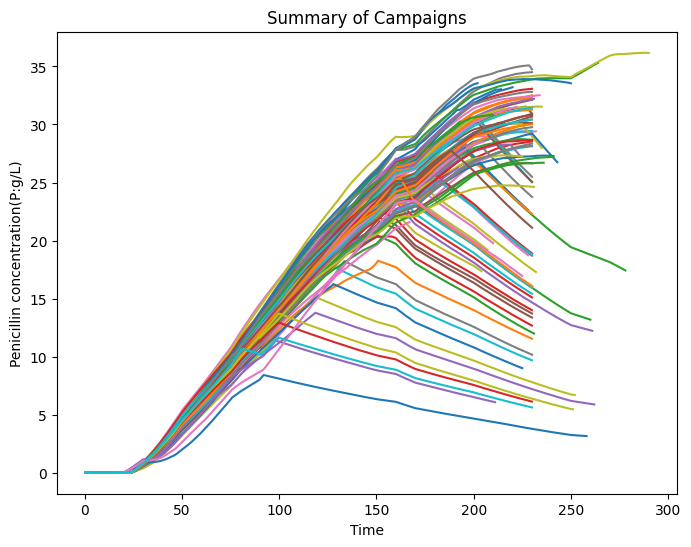

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
bp = variable_data.groupby('Batch reference(Batch_ref:Batch ref)').plot(x = 'Time (h)', y = variable_plot_selection.value,   ax=ax, legend = False, )
ax.set_title('Summary of Campaigns')
ax.set_xlabel('Time')
ax.set_ylabel(variable_plot_selection.value)



# DETECÇÃO DE OUTLIERS

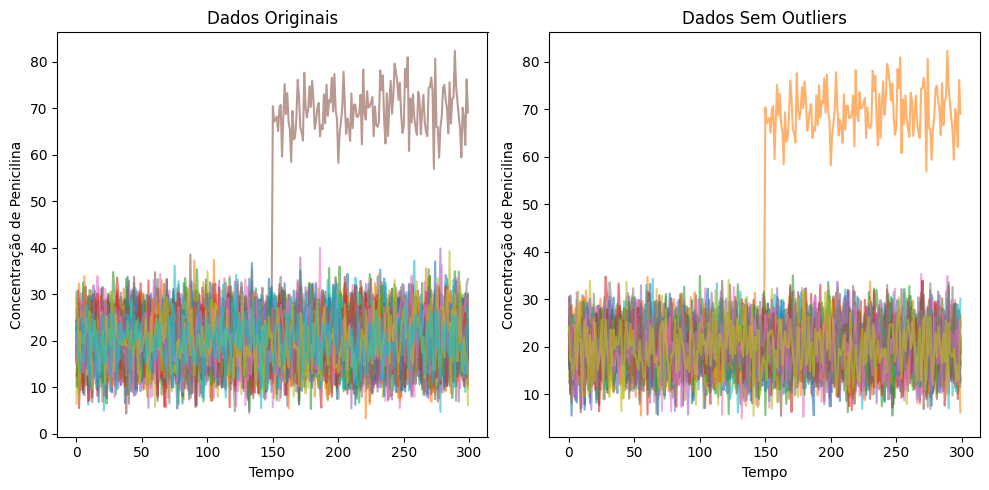

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Simulação de dados (substitua pelos seus dados reais)
# Cada coluna representa uma campanha, e cada linha um ponto no tempo
data = np.random.normal(20, 5, (300, 50))  # Simula 50 campanhas com 300 medições cada

# Adicionando alguns outliers para teste
data[150:, 5] += 50  # Outlier positivo

# Converter os dados para um DataFrame pandas
df = pd.DataFrame(data)

# Função para detectar e remover outliers
def remove_outliers(df, threshold=3):
    """
    Remove outliers com base no z-score.

    Args:
        df: DataFrame contendo os dados.
        threshold: Limite de z-score para considerar um ponto como outlier (padrão: 3).

    Returns:
        DataFrame sem as campanhas com outliers.
    """
    z_scores = df.apply(zscore, axis=0, nan_policy='omit')  # Calcula o z-score por coluna
    mask = (np.abs(z_scores) < threshold).all(axis=0)       # Verifica se todas as linhas estão abaixo do threshold
    return df.loc[:, mask]                                  # Retorna apenas as colunas válidas

# Remover outliers usando a função acima
data_cleaned = remove_outliers(df)

# Visualizar os gráficos antes e depois
plt.figure(figsize=(10, 5))

# Gráfico original
plt.subplot(1, 2, 1)
plt.plot(df, alpha=0.6)
plt.title("Dados Originais")
plt.xlabel("Tempo")
plt.ylabel("Concentração de Penicilina")

# Gráfico após remoção de outliers
plt.subplot(1, 2, 2)
plt.plot(data_cleaned, alpha=0.6)
plt.title("Dados Sem Outliers")
plt.xlabel("Tempo")
plt.ylabel("Concentração de Penicilina")

plt.tight_layout()
plt.show()

# Exibir número de colunas antes e depois
print(f"Número de campanhas originais: {df.shape[1]}")
print(f"Número de campanhas após remoção de outliers: {data_cleaned.shape[1]}")


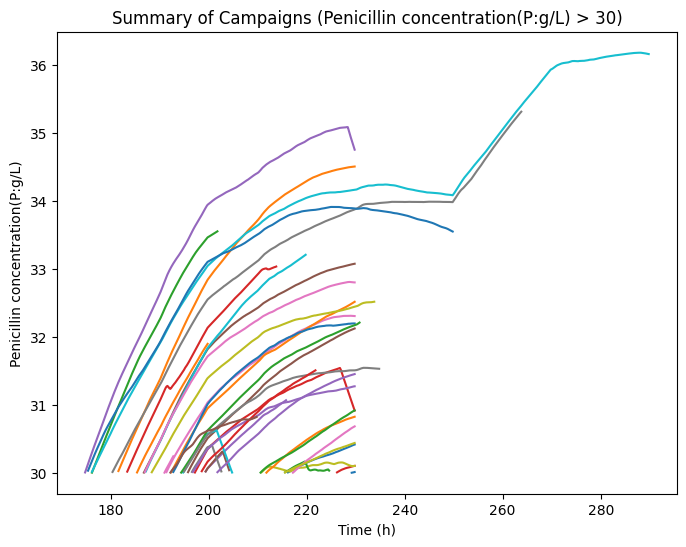

Número total de dados:  113935
Número de dados filtrados com concentração da penicilina maior que 30: 5612


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que variable_data é o DataFrame original contendo os dados

# Ajustar o tempo para começar em 0 dentro de cada campanha
variable_data['Time (h)'] = variable_data.groupby('Batch reference(Batch_ref:Batch ref)')['Time (h)'].transform(lambda x: x - x.min())

# Filtrar os dados para concentrações maiores que 30
filtered_data = variable_data[variable_data[variable_plot_selection.value] > 30]

# Criar o gráfico apenas com valores filtrados
fig, ax = plt.subplots(figsize=(8, 6))
filtered_data.groupby('Batch reference(Batch_ref:Batch ref)').plot(
    x='Time (h)',
    y=variable_plot_selection.value,
    ax=ax,
    legend=False
)
ax.set_title('Summary of Campaigns (Penicillin concentration(P:g/L) > 30)')
ax.set_xlabel('Time (h)')
ax.set_ylabel(variable_plot_selection.value)

plt.show()

# Supondo que o DataFrame seja `variable_data` e o nome da coluna seja `Concentration`
filtered_data = variable_data[variable_data['Penicillin concentration(P:g/L)'] > 30]

# Exibir o número de registros filtrados
print('Número total de dados: ', variable_data.shape[0])
print(f"Número de dados filtrados com concentração da penicilina maior que 30: {filtered_data.shape[0]}")

# Exibir os dados filtrados, se necessário
#print(filtered_data)


# Teste de algumas coisas

In [ ]:
#Saber cada valor da concentração da penicilina para saber quais estão com desvios excessivos
from IPython.display import display

# Exibe a tabela no Jupyter Notebook
display(filtered_data)

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
2211,216.2,65.0,100.0,80.0,0.0,50.582,46.6740,1.0216,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,2.0,2.0,0.0,164400.0,164130.0
2212,216.4,65.0,100.0,80.0,0.0,51.195,14.0020,67.7320,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,2.0,2.0,0.0,164930.0,165170.0
2213,216.6,65.0,100.0,80.0,0.0,51.033,43.5070,6.7732,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,2.0,2.0,0.0,164970.0,165700.0
2214,216.8,65.0,100.0,80.0,0.0,50.241,13.0520,98.1840,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,2.0,2.0,0.0,164500.0,164230.0
2215,217.0,65.0,100.0,80.0,0.0,48.788,69.3470,9.8184,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,2.0,2.0,0.0,164040.0,164770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111525,229.0,65.0,100.0,80.0,0.0,58.417,3.7780,0.0001,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,98.0,98.0,1.0,177400.0,177990.0
111526,229.2,65.0,100.0,80.0,0.0,61.620,1.1334,72.0230,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,98.0,98.0,1.0,178390.0,178650.0
111527,229.4,65.0,100.0,80.0,0.0,62.968,33.1650,7.2023,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,98.0,98.0,1.0,177880.0,178140.0
111528,229.6,65.0,100.0,80.0,0.0,62.656,9.9495,110.4700,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,98.0,98.0,1.0,178370.0,178960.0


### 100 melhores valores de penicilina

> Adicionar aspas



Top 100 Penicillin Concentrations:


,Batch reference(Batch_ref:Batch ref),Time (h),Penicillin concentration(P:g/L)
33163,29.0,287.6,36.183
33165,29.0,288.0,36.183
33162,29.0,287.4,36.183
33164,29.0,287.8,36.183
33166,29.0,288.2,36.183
...,...,...,...
33079,29.0,270.8,35.982
33078,29.0,270.6,35.972
33077,29.0,270.4,35.961
33076,29.0,270.2,35.950


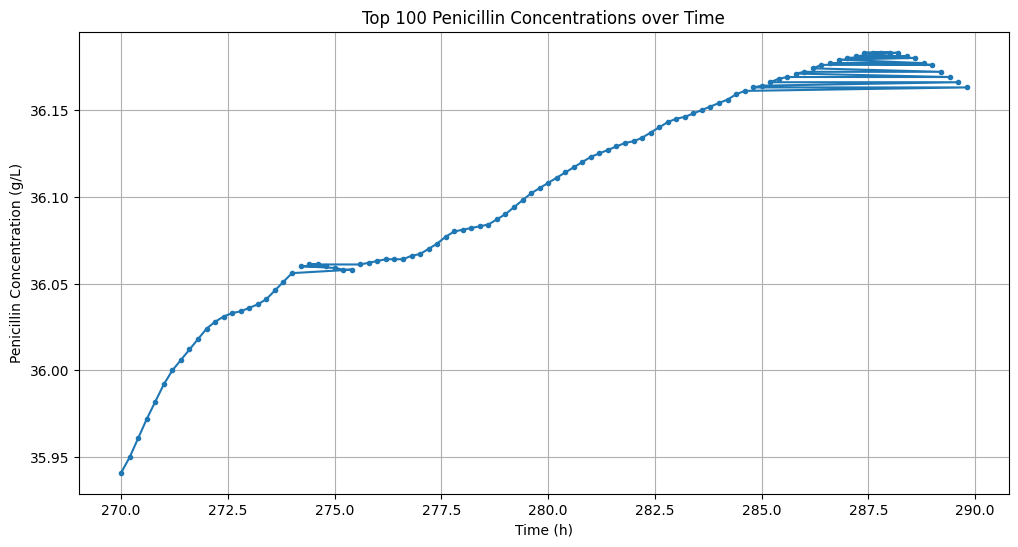

In [ ]:
#gerar uma tabela com os 100 melhores valores de concentração de penicilina pelo tempo e fazer um gráfico

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'variable_data' DataFrame is already loaded as in the previous code

# Sort the data by 'Penicillin concentration(P:g/L)' in descending order
sorted_data = variable_data.sort_values('Penicillin concentration(P:g/L)', ascending=False)

# Get the top 100 values
top_100_penicillin = sorted_data.head(100)

# Display the top 100 penicillin concentrations in a table
print("Top 100 Penicillin Concentrations:")
display(top_100_penicillin[['Batch reference(Batch_ref:Batch ref)', 'Time (h)', 'Penicillin concentration(P:g/L)']])


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(top_100_penicillin['Time (h)'], top_100_penicillin['Penicillin concentration(P:g/L)'], marker='.')
plt.xlabel('Time (h)')
plt.ylabel('Penicillin Concentration (g/L)')
plt.title('Top 100 Penicillin Concentrations over Time')
plt.grid(True)
plt.show()

# Relação dos 100 melhores dados adquiridos

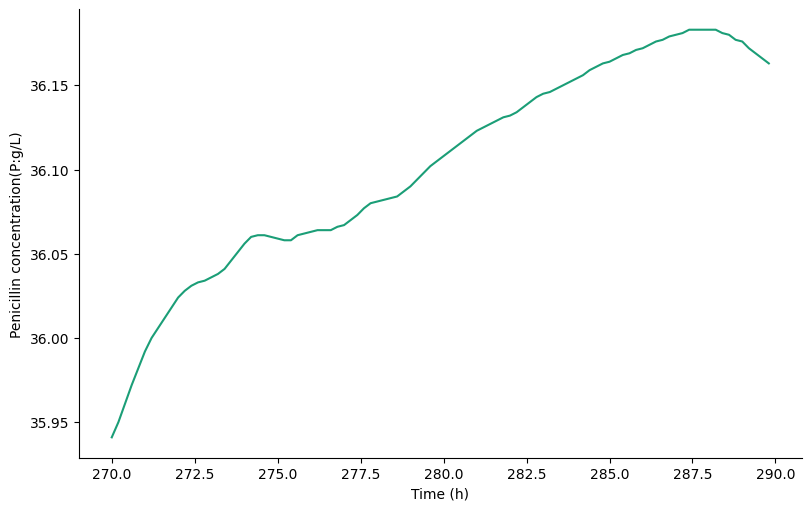

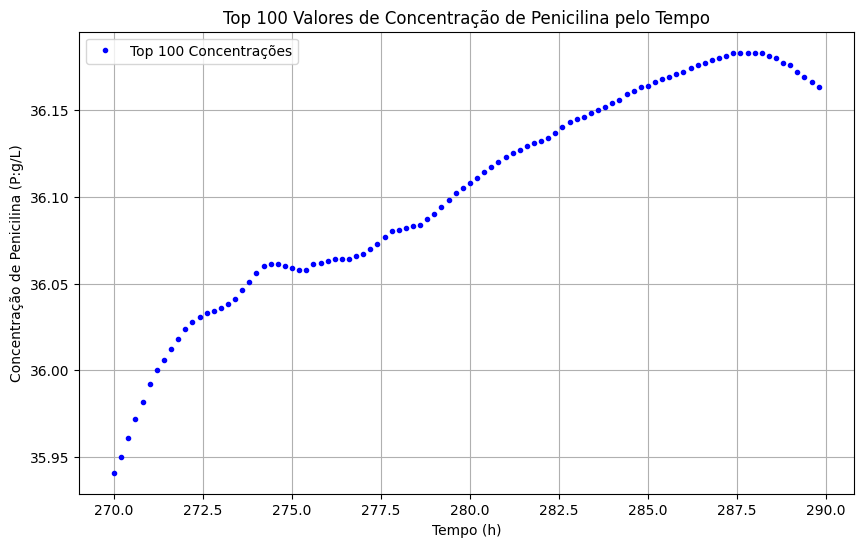

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time (h)']
  ys = series['Penicillin concentration(P:g/L)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
df_sorted = top_100_penicillin.sort_values('Time (h)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time (h)')
_ = plt.ylabel('Penicillin concentration(P:g/L)')

top_100_penicillin = sorted_data.head(100)

# Plotando os dados
plt.figure(figsize=(10, 6))
plt.plot(top_100_penicillin['Time (h)'], top_100_penicillin['Penicillin concentration(P:g/L)'], '.', color='blue', label='Top 100 Concentrações')
plt.title('Top 100 Valores de Concentração de Penicilina pelo Tempo')
plt.xlabel('Tempo (h)')
plt.ylabel('Concentração de Penicilina (P:g/L)')
plt.legend()
plt.grid(True)
plt.show()


# 50 Melhores valores de concentração da penicilina no processo de fermentação

In [ ]:
# prompt: faça uma tabela identificando os 50 melhores valores da concentração da penicilina em relação ao tempo decorrido de fermentação

# Assuming 'variable_data' DataFrame is already loaded as in the previous code

# Sort the data by 'Penicillin concentration(P:g/L)' in descending order
sorted_data = variable_data.sort_values('Penicillin concentration(P:g/L)', ascending=False)

# Get the top 50 values
top_50_penicillin = sorted_data.head(50)

# Display the top 50 penicillin concentrations in a table
print("Top 50 Penicillin Concentrations:")
display(top_50_penicillin[['Batch reference(Batch_ref:Batch ref)', 'Time (h)', 'Penicillin concentration(P:g/L)']])

Top 50 Penicillin Concentrations:


,Batch reference(Batch_ref:Batch ref),Time (h),Penicillin concentration(P:g/L)
33163,29.0,287.6,36.183
33165,29.0,288.0,36.183
33162,29.0,287.4,36.183
33164,29.0,287.8,36.183
33166,29.0,288.2,36.183
33161,29.0,287.2,36.181
33167,29.0,288.4,36.181
33160,29.0,287.0,36.180
33168,29.0,288.6,36.180
33159,29.0,286.8,36.179


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Time (h)'].plot(kind='hist', bins=20, title='Time (h)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Penicillin concentration(P:g/L)'].plot(kind='hist', bins=20, title='Penicillin concentration(P:g/L)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Time (h)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time (h)', y='Penicillin concentration(P:g/L)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Batch reference(Batch_ref:Batch ref)']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Batch reference(Batch_ref:Batch ref)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Batch reference(Batch_ref:Batch ref)')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Batch reference(Batch_ref:Batch ref)']
  ys = series['Penicillin concentration(P:g/L)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Batch reference(Batch_ref:Batch ref)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Batch reference(Batch_ref:Batch ref)')
_ = plt.ylabel('Penicillin concentration(P:g/L)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Batch reference(Batch_ref:Batch ref)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Batch reference(Batch_ref:Batch ref)'}, axis=1)
              .sort_values('Batch reference(Batch_ref:Batch ref)', ascending=True))
  xs = counted['Batch reference(Batch_ref:Batch ref)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Batch reference(Batch_ref:Batch ref)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Batch reference(Batch_ref:Batch ref)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time (h)']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Time (h)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time (h)')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Time (h)'].plot(kind='line', figsize=(8, 4), title='Time (h)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Penicillin concentration(P:g/L)'].plot(kind='line', figsize=(8, 4), title='Penicillin concentration(P:g/L)')
plt.gca().spines[['top', 'right']].set_visible(False)

## Raman Data plot


In [ ]:
raman_data = variable_data.groupby('Batch reference(Batch_ref:Batch ref)').get_group(1)

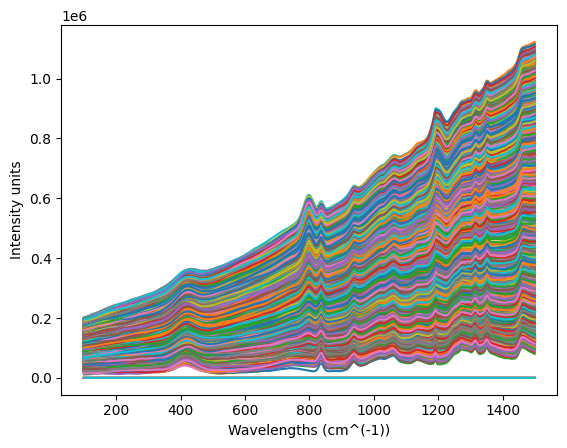

In [ ]:
Intensity = raman_spectra.iloc[100:1208, 100:1500]
x_wave = raman_spectra.index[100:1500]
Temp = Intensity.transpose()
import matplotlib.pyplot as plt
plt.plot(x_wave,Temp)
plt.ylabel('Intensity units')
plt.xlabel('Wavelengths (cm^(-1))')
plt
plt.show()